In [2]:
from google.colab import files
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.stats.stattools import durbin_watson


# General CPI monthly
CPI scaled

In [ ]:
uploaded = files.upload()
df_cpi = pd.read_csv('general_cpi_monthly_agg.csv')
scaler = StandardScaler()
cpi_scaled = scaler.fit_transform(df_cpi[['IPC']].fillna(0))

# Replace the original 'CPI_Growth_Rate' column with the standardized values
df_cpi['CPI_Scaled'] = cpi_scaled

# Multiply the 'LIKELIHOODOFDEFAULT' column by 100
df_cpi['LIKELIHOODOFDEFAULT'] = df_cpi['LIKELIHOODOFDEFAULT'] * 100
df_cpi.head()

Saving general_cpi_monthly_agg.csv to general_cpi_monthly_agg.csv


,EXTRACTIONDATE,REG,Descripción series,Date (varchar),Date (#),IPC,YEAR,MONTH,LIKELIHOODOFDEFAULT,DATE,CPI_Scaled
0,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Jan.2009,2009-01-01,59.05,2009,1,5.2036,2009-01-01,-1.188744
1,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Feb.2009,2009-02-01,58.28,2009,2,5.0888,2009-02-01,-1.252645
2,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Mar.2009,2009-03-01,58.30,2009,3,5.0589,2009-03-01,-1.250985
3,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Apr.2009,2009-04-01,58.21,2009,4,5.8679,2009-04-01,-1.258454
4,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),May.2009,2009-05-01,58.09,2009,5,6.5349,2009-05-01,-1.268413


In [ ]:
df_cpi

,EXTRACTIONDATE,REG,Descripción series,Date (varchar),Date (#),IPC,YEAR,MONTH,LIKELIHOODOFDEFAULT,DATE,CPI_Scaled
0,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Jan.2009,2009-01-01,59.05,2009,1,5.2036,2009-01-01,-1.188744
1,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Feb.2009,2009-02-01,58.28,2009,2,5.0888,2009-02-01,-1.252645
2,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Mar.2009,2009-03-01,58.30,2009,3,5.0589,2009-03-01,-1.250985
3,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Apr.2009,2009-04-01,58.21,2009,4,5.8679,2009-04-01,-1.258454
4,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),May.2009,2009-05-01,58.09,2009,5,6.5349,2009-05-01,-1.268413
...,...,...,...,...,...,...,...,...,...,...,...
175,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Aug.2023,2023-08-01,99.90,2023,8,27.3653,2023-08-01,2.201311
176,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Sep.2023,2023-09-01,100.53,2023,9,29.3259,2023-09-01,2.253594
177,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Oct.2023,2023-10-01,100.82,2023,10,26.7782,2023-10-01,2.277660
178,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Nov.2023,2023-11-01,101.58,2023,11,36.0104,2023-11-01,2.340731


In [ ]:
# pick only CPI and Default Likelihood
df_cpi_corr = df_cpi[['CPI_Scaled', 'LIKELIHOODOFDEFAULT']]
df_cpi_corr.head()

,CPI_Scaled,LIKELIHOODOFDEFAULT
0,-1.188744,5.2036
1,-1.252645,5.0888
2,-1.250985,5.0589
3,-1.258454,5.8679
4,-1.268413,6.5349


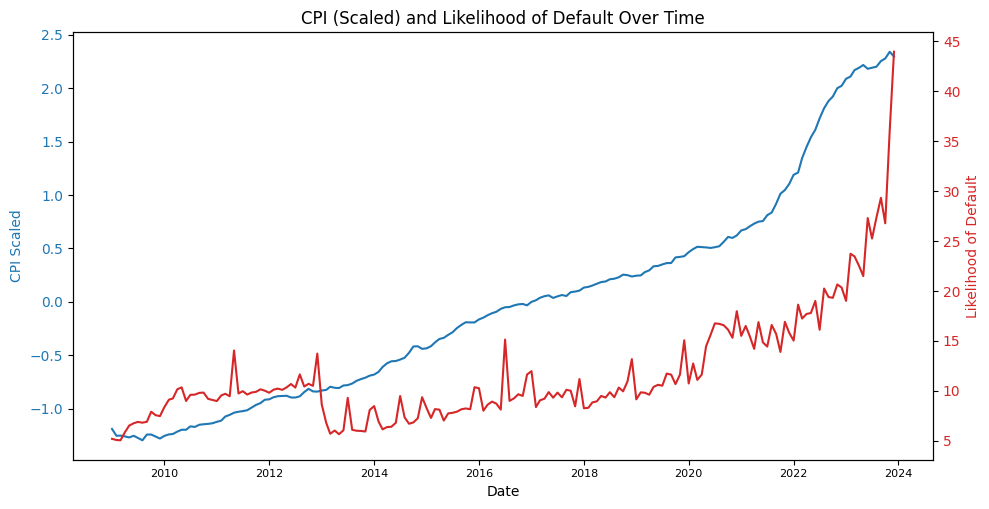

In [ ]:
df_cpi['Date (#)'] = pd.to_datetime(df_cpi['Date (#)'])
df_cpi = df_cpi[df_cpi['Date (#)'].dt.year != 2024]  # Exclude year 2024

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot CPI Scaled
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI Scaled', color=color)
ax1.plot(df_cpi['Date (#)'], df_cpi['CPI_Scaled'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelsize=8)

# Create a second y-axis for Likelihood of Default
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Likelihood of Default', color=color)
ax2.plot(df_cpi['Date (#)'], df_cpi['LIKELIHOODOFDEFAULT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Final adjustments and show plot
fig.tight_layout()
plt.title('CPI (Scaled) and Likelihood of Default Over Time')
plt.xticks(rotation=45)
plt.show()

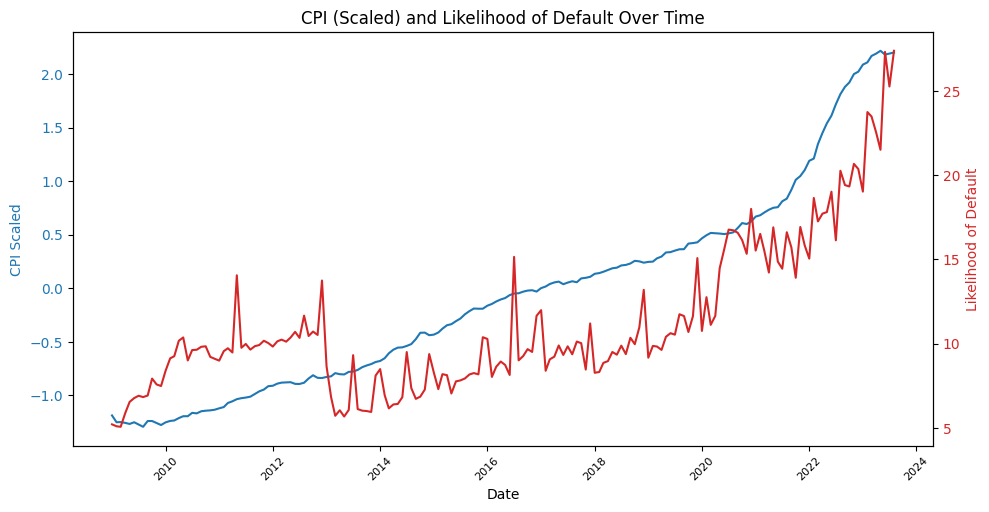

In [ ]:
# Convert the 'Date (#)' column to datetime if not already done
df_cpi['Date (#)'] = pd.to_datetime(df_cpi['Date (#)'])

# Filter the dataframe to exclude data from September 2023 onwards
df_cpi = df_cpi[(df_cpi['Date (#)'] < '2023-09-01')]

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot CPI Scaled on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI Scaled', color=color)
ax1.plot(df_cpi['Date (#)'], df_cpi['CPI_Scaled'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelsize=8, rotation=45)

# Create a second y-axis for Likelihood of Default
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Likelihood of Default', color=color)
ax2.plot(df_cpi['Date (#)'], df_cpi['LIKELIHOODOFDEFAULT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Final adjustments and show plot
fig.tight_layout()
plt.title('CPI (Scaled) and Likelihood of Default Over Time')
plt.show()


In [ ]:
# Compute the Pearson correlation coefficient
corr_coef = np.corrcoef(df_cpi_corr['CPI_Scaled'], df_cpi_corr['LIKELIHOODOFDEFAULT'])[0, 1]
df_cpi_corr = df_cpi_corr[df_cpi_corr['LIKELIHOODOFDEFAULT'] <= 30]

# Prepare data for OLS regression
X = df_cpi_corr['CPI_Scaled']
X = sm.add_constant(X)  # adding a constant to the model
y = df_cpi_corr['LIKELIHOODOFDEFAULT']

# Fit OLS model
cpi_model = sm.OLS(y, X).fit()

# Print the summary of the OLS model
print(cpi_model.summary())
# Print the result
print(f"Model Pearson Correlation Coefficient: {corr_coef}")
print("Model R-squared: {:.3f}".format(cpi_model.rsquared))

print("\nModel Coefficients:")
print(f"Intercept: {cpi_model.params[0]:.3f}")
print(f"Slope (CPI,scaled): {cpi_model.params[1]:.3f}")

print("\nModel P-values:")
print(f"P-value (Intercept): {cpi_model.pvalues[0]:.3f}")
print(f"P-value (CPI,scaled): {cpi_model.pvalues[1]:.3f}")

print("\nModel Standard Errors:")
print(f"Standard Error (Intercept): {cpi_model.bse[0]:.3f}")
print(f"Standard Error (CPI,scaled): {cpi_model.bse[1]:.3f}")

                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.864
Model:                             OLS   Adj. R-squared:                  0.863
Method:                  Least Squares   F-statistic:                     642.6
Date:                 Mon, 06 May 2024   Prob (F-statistic):           1.39e-45
Time:                         22:04:04   Log-Likelihood:                -212.59
No. Observations:                  103   AIC:                             429.2
Df Residuals:                      101   BIC:                             434.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6209      0.242     39.68

In [ ]:
for lag in range(100, 120):
    bg_test = acorr_breusch_godfrey(cpi_model, nlags=lag)
    print(f"Breusch-Godfrey test statistics with {lag} lag(s):", bg_test[0])
    print("p-value:", bg_test[1])

strong autocorrelation, increases with number of lags

General CPI Scaled, moving averages

In [ ]:
# Calculate moving averages
window_size = 31  # 12 periods moving average
df_cpi_corr['CPI_MA'] = df_cpi_corr['CPI_Scaled'].rolling(window=window_size).mean()


# Drop NA values that result from moving average calculation
df_cpi_corr.dropna(inplace=True)

# Prepare data for linear regression
X_ma = df_cpi_corr['CPI_MA']
X_ma = sm.add_constant(X_ma)  # adding a constant to the model
y_ma = df_cpi_corr['LIKELIHOODOFDEFAULT']

# Fit regression model
ma_model = sm.OLS(y_ma, X_ma).fit()

# Print the summary of the model
print(ma_model.summary())

# You could also calculate the Pearson correlation coefficient for the smoothed series if interested
corr_coef_ma = np.corrcoef(df_cpi_corr['CPI_MA'], df_cpi_corr['LIKELIHOODOFDEFAULT'])[0, 1]
print(f"Moving Average Model Pearson Correlation Coefficient: {corr_coef_ma}")
print("Moving Average Model R-squared: {:.3f}".format(ma_model.rsquared))

print("\nMoving Average Model Coefficients:")
print(f"Intercept: {ma_model.params[0]:.3f}")
print(f"Slope (CPI, moving average): {ma_model.params[1]:.3f}")

print("\nMoving Average Model P-values:")
print(f"P-value (Intercept): {ma_model.pvalues[0]:.3f}")
print(f"P-value (CPI, moving average): {ma_model.pvalues[1]:.3f}")

print("\nMoving Average Model Standard Errors:")
print(f"Standard Error (Intercept): {ma_model.bse[0]:.3f}")
print(f"Standard Error (CPI, moving average): {ma_model.bse[1]:.3f}")


                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.848
Model:                             OLS   Adj. R-squared:                  0.845
Method:                  Least Squares   F-statistic:                     257.0
Date:                 Mon, 06 May 2024   Prob (F-statistic):           1.88e-20
Time:                         22:07:00   Log-Likelihood:                -93.156
No. Observations:                   48   AIC:                             190.3
Df Residuals:                       46   BIC:                             194.1
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9202      0.499     21.88

<ipython-input-32-30ad3eac43c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi_corr['CPI_MA'] = df_cpi_corr['CPI_Scaled'].rolling(window=window_size).mean()
<ipython-input-32-30ad3eac43c5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi_corr.dropna(inplace=True)


In [ ]:
print('Original: slope = 5.4278, p=0.00, DW=0.37')
results = []

# Loop over window sizes from 2 to 73 （this is max）
for window_size in range(2, 73):
    # Calculate moving averages
    df_cpi_corr['CPI_MA'] = df_cpi_corr['CPI_Scaled'].rolling(window=window_size).mean()

    # Drop NA values that result from moving average calculation
    df_valid = df_cpi_corr.dropna()

    # Prepare data for linear regression
    X_ma = df_valid['CPI_MA']
    X_ma = sm.add_constant(X_ma)  # adding a constant to the model
    y_ma = df_valid['LIKELIHOODOFDEFAULT']

    # Fit regression model
    ma_model = sm.OLS(y_ma, X_ma).fit()

    # Retrieve the model's parameters
    intercept, slope = ma_model.params
    intercept_pvalue, slope_pvalue = ma_model.pvalues
    dw_score = durbin_watson(ma_model.resid)

    # Store results in list
    results.append({
        'Window Size': window_size,
        'Slope': slope,
        'Slope P-Value': slope_pvalue,
        'Durbin-Watson Score': dw_score
    })

# Print results
for result in results:
    print(f"Window Size: {result['Window Size']}")
    print(f"Slope: {result['Slope']:.3f}, P-value: {result['Slope P-Value']:.3f}")
    print(f"Durbin-Watson Score: {result['Durbin-Watson Score']:.3f}")
    print('---')


Original: slope = 5.4278, p=0.00, DW=0.37


<ipython-input-29-628c528b45be>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi_corr['CPI_MA'] = df_cpi_corr['CPI_Scaled'].rolling(window=window_size).mean()
<ipython-input-29-628c528b45be>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi_corr['CPI_MA'] = df_cpi_corr['CPI_Scaled'].rolling(window=window_size).mean()
<ipython-input-29-628c528b45be>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

Window Size: 2
Slope: 6.646, P-value: 0.000
Durbin-Watson Score: 0.893
---
Window Size: 3
Slope: 6.723, P-value: 0.000
Durbin-Watson Score: 0.913
---
Window Size: 4
Slope: 6.810, P-value: 0.000
Durbin-Watson Score: 0.942
---
Window Size: 5
Slope: 6.893, P-value: 0.000
Durbin-Watson Score: 0.967
---
Window Size: 6
Slope: 6.995, P-value: 0.000
Durbin-Watson Score: 0.993
---
Window Size: 7
Slope: 7.098, P-value: 0.000
Durbin-Watson Score: 1.018
---
Window Size: 8
Slope: 7.172, P-value: 0.000
Durbin-Watson Score: 1.022
---
Window Size: 9
Slope: 7.314, P-value: 0.000
Durbin-Watson Score: 1.019
---
Window Size: 10
Slope: 7.388, P-value: 0.000
Durbin-Watson Score: 1.064
---
Window Size: 11
Slope: 7.466, P-value: 0.000
Durbin-Watson Score: 1.108
---
Window Size: 12
Slope: 7.560, P-value: 0.000
Durbin-Watson Score: 1.145
---
Window Size: 13
Slope: 7.656, P-value: 0.000
Durbin-Watson Score: 1.189
---
Window Size: 14
Slope: 7.771, P-value: 0.000
Durbin-Watson Score: 1.220
---
Window Size: 15
Slop

In [ ]:
df_cpi_corr

,CPI_Scaled,LIKELIHOODOFDEFAULT,CPI_MA
100,0.061053,9.8830,NaN
101,0.036987,9.3208,NaN
102,0.051925,9.8322,NaN
103,0.064373,9.3604,NaN
104,0.055244,10.1146,NaN
...,...,...,...
173,2.181394,27.3014,0.778173
174,2.191353,25.2479,0.807887
175,2.201311,27.3653,0.837567
176,2.253594,29.3259,0.868099


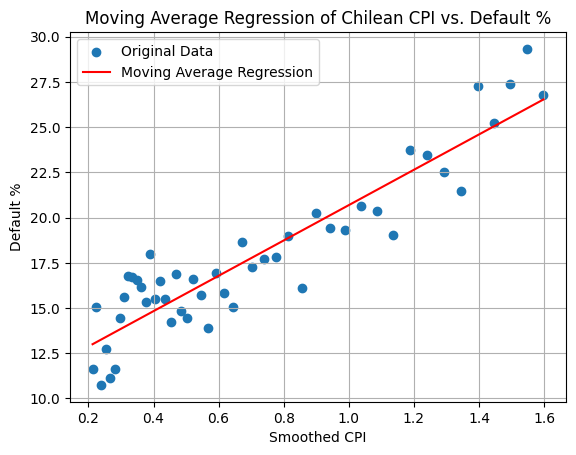

In [ ]:
# Scatter plot of original data
plt.scatter(df_cpi_corr['CPI_MA'], df_cpi_corr['LIKELIHOODOFDEFAULT'], label='Original Data')

# Plot the regression line
plt.plot(df_cpi_corr['CPI_MA'], ma_model.predict(X_ma), color='red', label='Moving Average Regression')

plt.title('Moving Average Regression of Chilean CPI vs. Default %')
plt.xlabel('Smoothed CPI')
plt.ylabel('Default %')
plt.legend()
plt.grid(True)
plt.show()


# General CPI Growth rate monthly
not scaled, %-%


In [ ]:
#Calculate growth rate into column
df_cpi['IPC'] = pd.to_numeric(df_cpi['IPC'], errors='coerce')
df_cpi['CPI_Growth_Rate'] = df_cpi['IPC'].pct_change()
df_cpi['CPI_Growth_Rate'] = df_cpi['CPI_Growth_Rate'] * 100
df_cpi


,EXTRACTIONDATE,REG,Descripción series,Date (varchar),Date (#),IPC,YEAR,MONTH,LIKELIHOODOFDEFAULT,DATE,CPI_Scaled,CPI_Growth_Rate
0,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Jan.2009,2009-01-01,59.05,2009,1,5.2036,2009-01-01,-1.188744,NaN
1,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Feb.2009,2009-02-01,58.28,2009,2,5.0888,2009-02-01,-1.252645,-1.303980
2,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Mar.2009,2009-03-01,58.30,2009,3,5.0589,2009-03-01,-1.250985,0.034317
3,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Apr.2009,2009-04-01,58.21,2009,4,5.8679,2009-04-01,-1.258454,-0.154374
4,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),May.2009,2009-05-01,58.09,2009,5,6.5349,2009-05-01,-1.268413,-0.206150
...,...,...,...,...,...,...,...,...,...,...,...,...
176,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Sep.2023,2023-09-01,100.53,2023,9,29.3259,2023-09-01,2.253594,0.630631
177,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Oct.2023,2023-10-01,100.82,2023,10,26.7782,2023-10-01,2.277660,0.288471
178,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Nov.2023,2023-11-01,101.58,2023,11,36.0104,2023-11-01,2.340731,0.753819
179,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Dec.2023,2023-12-01,101.04,2023,12,43.9466,2023-12-01,2.295917,-0.531601


In [ ]:
df_cpi_gr = df_cpi[['CPI_Growth_Rate', 'LIKELIHOODOFDEFAULT']]
df_cpi_gr.head()

,CPI_Growth_Rate,LIKELIHOODOFDEFAULT
0,NaN,5.2036
1,-1.303980,5.0888
2,0.034317,5.0589
3,-0.154374,5.8679
4,-0.206150,6.5349


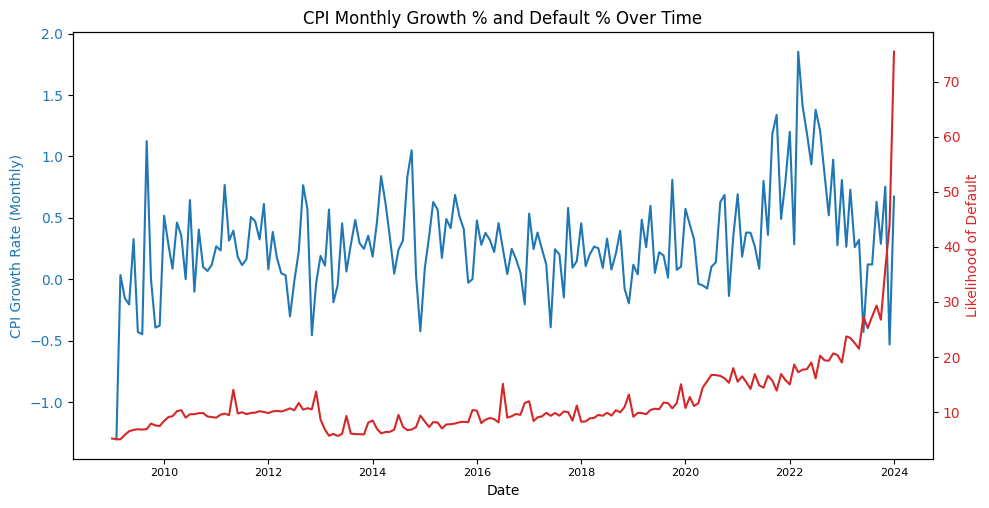

In [ ]:
# CPI and Likelihood of Default Over Time

# Convert 'Date (#)' column to datetime format
df_cpi['Date (#)'] = pd.to_datetime(df_cpi['Date (#)'])

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI Growth Rate (Monthly)', color=color)
ax1.plot(df_cpi['Date (#)'], df_cpi['CPI_Growth_Rate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.tick_params(axis='x', labelsize=8)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Likelihood of Default', color=color)  # We already handled the x-label with ax1
ax2.plot(df_cpi['Date (#)'], df_cpi['LIKELIHOODOFDEFAULT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure tight layout so labels are not cut off
plt.title('CPI Monthly Growth % and Default % Over Time')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_cpi_gr = df_cpi_gr.dropna()

y = df_cpi_gr['LIKELIHOODOFDEFAULT']
X = df_cpi_gr['CPI_Growth_Rate']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.031
Model:                             OLS   Adj. R-squared:                  0.026
Method:                  Least Squares   F-statistic:                     5.708
Date:                 Wed, 01 May 2024   Prob (F-statistic):             0.0179
Time:                         11:33:43   Log-Likelihood:                -612.03
No. Observations:                  180   AIC:                             1228.
Df Residuals:                      178   BIC:                             1234.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.0678      

In [ ]:
# Print the result
print(f"Model Pearson Correlation Coefficient: {corr_coef}")
print("Model R-squared: {:.3f}".format(model.rsquared))

print("\nModel Coefficients:")
print(f"Intercept: {model.params[0]:.3f}")
print(f"Slope (CPI Growth): {model.params[1]:.3f}")

print("\nModel P-values:")
print(f"P-value (Intercept): {model.pvalues[0]:.3f}")
print(f"P-value (CPI Growth): {model.pvalues[1]:.3f}")

print("\nModel Standard Errors:")
print(f"Standard Error (Intercept): {model.bse[0]:.3f}")
print(f"Standard Error (CPI Growth): {model.bse[1]:.3f}")

Model Pearson Correlation Coefficient: -0.44748691572054256
Model R-squared: 0.031

Model Coefficients:
Intercept: 11.068
Slope (CPI Growth): 3.242

Model P-values:
P-value (Intercept): 0.000
P-value (CPI Growth): 0.018

Model Standard Errors:
Standard Error (Intercept): 0.682
Standard Error (CPI Growth): 1.357


CPI Monthly Growth Moving average

In [ ]:
# Calculate moving averages
window_size = 24  # 12 periods moving average
df_cpi_gr['CPI_GR_MA'] = df_cpi_gr['CPI_Growth_Rate'].rolling(window=window_size).mean()

# Drop NA values that result from moving average calculation
df_cpi_gr.dropna(inplace=True)

# Prepare data for linear regression
X_ma = df_cpi_gr['CPI_GR_MA']
X_ma = sm.add_constant(X_ma)  # adding a constant to the model
y_ma = df_cpi_gr['LIKELIHOODOFDEFAULT']

# Fit regression model
ma_model = sm.OLS(y_ma, X_ma).fit()

# Print the summary of the model
print(ma_model.summary())

# You could also calculate the Pearson correlation coefficient for the smoothed series if interested
corr_coef_ma = np.corrcoef(df_cpi_gr['CPI_GR_MA'], df_cpi_gr['LIKELIHOODOFDEFAULT'])[0, 1]
print(f"Moving Average Model Pearson Correlation Coefficient: {corr_coef_ma}")
print("Moving Average Model R-squared: {:.3f}".format(ma_model.rsquared))

print("\nMoving Average Model Coefficients:")
print(f"Intercept: {ma_model.params[0]:.3f}")
print(f"Slope (CPI, moving average): {ma_model.params[1]:.3f}")

print("\nMoving Average Model P-values:")
print(f"P-value (Intercept): {ma_model.pvalues[0]:.3f}")
print(f"P-value (CPI GR, moving average): {ma_model.pvalues[1]:.3f}")

print("\nMoving Average Model Standard Errors:")
print(f"Standard Error (Intercept): {ma_model.bse[0]:.3f}")
print(f"Standard Error (CPI GR, moving average): {ma_model.bse[1]:.3f}")


                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.402
Model:                             OLS   Adj. R-squared:                  0.398
Method:                  Least Squares   F-statistic:                     104.0
Date:                 Wed, 01 May 2024   Prob (F-statistic):           5.21e-19
Time:                         11:34:53   Log-Likelihood:                -502.87
No. Observations:                  157   AIC:                             1010.
Df Residuals:                      155   BIC:                             1016.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9450      0.977      4.03

In [ ]:
print('Original: slope =3.2420, p=0.018, DW=0.212')
results = []

# Loop over window sizes from 2 to 38 (max)
for window_size in range(2, 38):
    # Calculate moving averages
    df_cpi_gr['CPI_GR_MA'] = df_cpi_gr['CPI_Growth_Rate'].rolling(window=window_size).mean()

    # Drop NA values that result from moving average calculation
    df_valid = df_cpi_gr.dropna()

    # Prepare data for linear regression
    X_ma = df_valid['CPI_GR_MA']
    X_ma = sm.add_constant(X_ma)  # adding a constant to the model
    y_ma = df_valid['LIKELIHOODOFDEFAULT']

    # Fit regression model
    ma_model = sm.OLS(y_ma, X_ma).fit()

    # Retrieve the model's parameters
    intercept, slope = ma_model.params
    intercept_pvalue, slope_pvalue = ma_model.pvalues
    dw_score = durbin_watson(ma_model.resid)

    # Store results in list
    results.append({
        'Window Size': window_size,
        'Slope': slope,
        'Slope P-Value': slope_pvalue,
        'Durbin-Watson Score': dw_score
    })

# Print results
for result in results:
    print(f"Window Size: {result['Window Size']}")
    print(f"Slope: {result['Slope']:.3f}, P-value: {result['Slope P-Value']:.3f}")
    print(f"Durbin-Watson Score: {result['Durbin-Watson Score']:.3f}")
    print('---')


Original: slope =3.2420, p=0.018, DW=0.212
Window Size: 2
Slope: 2.627, P-value: 0.188
Durbin-Watson Score: 0.197
---
Window Size: 3
Slope: 4.878, P-value: 0.025
Durbin-Watson Score: 0.197
---
Window Size: 4
Slope: 5.883, P-value: 0.011
Durbin-Watson Score: 0.203
---
Window Size: 5
Slope: 7.077, P-value: 0.004
Durbin-Watson Score: 0.194
---
Window Size: 6
Slope: 7.479, P-value: 0.003
Durbin-Watson Score: 0.187
---
Window Size: 7
Slope: 7.604, P-value: 0.003
Durbin-Watson Score: 0.191
---
Window Size: 8
Slope: 7.850, P-value: 0.003
Durbin-Watson Score: 0.193
---
Window Size: 9
Slope: 8.773, P-value: 0.001
Durbin-Watson Score: 0.198
---
Window Size: 10
Slope: 9.774, P-value: 0.000
Durbin-Watson Score: 0.205
---
Window Size: 11
Slope: 11.056, P-value: 0.000
Durbin-Watson Score: 0.208
---
Window Size: 12
Slope: 12.154, P-value: 0.000
Durbin-Watson Score: 0.209
---
Window Size: 13
Slope: 13.232, P-value: 0.000
Durbin-Watson Score: 0.218
---
Window Size: 14
Slope: 14.176, P-value: 0.000
Durb

# Chile GDP normalized monthly
Scaled

In [ ]:
uploaded = files.upload()
df_gdp = pd.read_csv('gdp_norm_monthly_agg.csv')

scaler = StandardScaler()
gdp_scaled = scaler.fit_transform(df_gdp[['GDP_NORMALIZED']].fillna(0))

# Replace the original 'CPI_Growth_Rate' column with the standardized values
df_gdp['GDP_Scaled'] = gdp_scaled

# Multiply the 'LIKELIHOODOFDEFAULT' column by 100
df_gdp['LIKELIHOODOFDEFAULT'] = df_gdp['LIKELIHOODOFDEFAULT'] * 100
df_gdp.head()

Saving gdp_norm_monthly_agg.csv to gdp_norm_monthly_agg.csv


,EXTRACTIONDATE,OBSERVATION_DATE,GDP_NORMALIZED,YEAR,MONTH,LIKELIHOODOFDEFAULT,GDP_Scaled
0,2024-03-31,2006-01-01,100.776983,2006,1,1.9363,0.486165
1,2024-03-31,2006-02-01,100.804387,2006,2,1.7998,0.502420
2,2024-03-31,2006-03-01,100.858167,2006,3,3.6930,0.534320
3,2024-03-31,2006-04-01,100.934271,2006,4,3.6691,0.579462
4,2024-03-31,2006-05-01,101.023159,2006,5,2.6561,0.632187


In [ ]:
# pick only Scaled Normalized GDP and Default Likelihood
df_gdp_corr = df_gdp[['GDP_Scaled', 'LIKELIHOODOFDEFAULT']]
df_gdp_corr.head()

,GDP_Scaled,LIKELIHOODOFDEFAULT
0,0.486165,1.9363
1,0.502420,1.7998
2,0.534320,3.6930
3,0.579462,3.6691
4,0.632187,2.6561


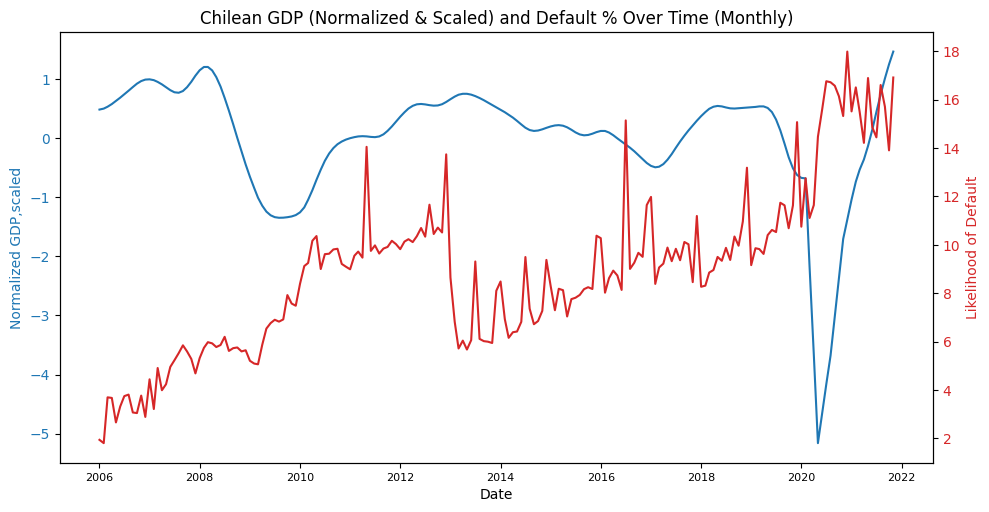

In [ ]:
# Normalized GDP and Likelihood of Default Over Time

# Convert 'Date' column to datetime format
df_gdp['OBSERVATION_DATE'] = pd.to_datetime(df_gdp['OBSERVATION_DATE'])

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized GDP,scaled', color=color)
ax1.plot(df_gdp['OBSERVATION_DATE'], df_gdp['GDP_Scaled'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.tick_params(axis='x', labelsize=8)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Likelihood of Default', color=color)  # We already handled the x-label with ax1
ax2.plot(df_gdp['OBSERVATION_DATE'], df_gdp['LIKELIHOODOFDEFAULT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure tight layout so labels are not cut off
plt.title('Chilean GDP (Normalized & Scaled) and Default % Over Time (Monthly)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Compute the Pearson correlation coefficient
corr_coef = np.corrcoef(df_gdp_corr['GDP_Scaled'], df_gdp_corr['LIKELIHOODOFDEFAULT'])[0, 1]

# Prepare data for OLS regression
X = df_gdp_corr['GDP_Scaled']
X = sm.add_constant(X)  # adding a constant to the model
y = df_gdp_corr['LIKELIHOODOFDEFAULT']

# Fit OLS model
gdp_model = sm.OLS(y, X).fit()

# Print the summary of the OLS model
print(gdp_model.summary())

                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.200
Model:                             OLS   Adj. R-squared:                  0.196
Method:                  Least Squares   F-statistic:                     47.32
Date:                 Wed, 01 May 2024   Prob (F-statistic):           8.57e-11
Time:                         11:02:22   Log-Likelihood:                -481.97
No. Observations:                  191   AIC:                             967.9
Df Residuals:                      189   BIC:                             974.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8996      0.219     40.54

In [ ]:
# Print the result
print(f"Model Pearson Correlation Coefficient: {corr_coef}")
print("Model R-squared: {:.3f}".format(gdp_model.rsquared))

print("\nModel Coefficients:")
print(f"Intercept: {gdp_model.params[0]:.3f}")
print(f"Slope (Normalized GDP,scaled): {gdp_model.params[1]:.3f}")

print("\nModel P-values:")
print(f"P-value (Intercept): {gdp_model.pvalues[0]:.3f}")
print(f"P-value (Normalized GDP,scaled): {gdp_model.pvalues[1]:.3f}")

print("\nModel Standard Errors:")
print(f"Standard Error (Intercept): {gdp_model.bse[0]:.3f}")
print(f"Standard Error (Normalized GDP,scaled): {gdp_model.bse[1]:.3f}")

Model Pearson Correlation Coefficient: -0.44748691572054256
Model R-squared: 0.200

Model Coefficients:
Intercept: 8.900
Slope (Normalized GDP,scaled): -1.510

Model P-values:
P-value (Intercept): 0.000
P-value (Normalized GDP,scaled): 0.000

Model Standard Errors:
Standard Error (Intercept): 0.219
Standard Error (Normalized GDP,scaled): 0.219


In [ ]:
# Calculate moving averages
window_size = 33  # 24 periods moving average
df_gdp_corr['GDP_MA'] = df_gdp_corr['GDP_Scaled'].rolling(window=window_size).mean()

# Drop NA values that result from moving average calculation
df_gdp_corr.dropna(inplace=True)

# Prepare data for linear regression
X_ma = df_gdp_corr['GDP_MA']
X_ma = sm.add_constant(X_ma)  # adding a constant to the model
y_ma = df_gdp_corr['LIKELIHOODOFDEFAULT']

# Fit regression model
ma_model = sm.OLS(y_ma, X_ma).fit()

# Print the summary of the model
print(ma_model.summary())

# You could also calculate the Pearson correlation coefficient for the smoothed series if interested
corr_coef_ma = np.corrcoef(df_gdp_corr['GDP_MA'], df_gdp_corr['LIKELIHOODOFDEFAULT'])[0, 1]
print(f"Moving Average Model Pearson Correlation Coefficient: {corr_coef_ma}")
print("Moving Average Model R-squared: {:.3f}".format(ma_model.rsquared))

print("\nMoving Average Model Coefficients:")
print(f"Intercept: {ma_model.params[0]:.3f}")
print(f"Slope (GDP, moving average): {ma_model.params[1]:.3f}")

print("\nMoving Average Model P-values:")
print(f"P-value (Intercept): {ma_model.pvalues[0]:.3f}")
print(f"P-value (GDP, moving average): {ma_model.pvalues[1]:.3f}")

print("\nMoving Average Model Standard Errors:")
print(f"Standard Error (Intercept): {ma_model.bse[0]:.3f}")
print(f"Standard Error (GDP, moving average): {ma_model.bse[1]:.3f}")


                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.582
Model:                             OLS   Adj. R-squared:                  0.574
Method:                  Least Squares   F-statistic:                     77.83
Date:                 Wed, 01 May 2024   Prob (F-statistic):           3.50e-12
Time:                         11:45:17   Log-Likelihood:                -119.37
No. Observations:                   58   AIC:                             242.7
Df Residuals:                       56   BIC:                             246.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9487      0.283     38.73

<ipython-input-38-aa9a26ab675b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp_corr['GDP_MA'] = df_gdp_corr['GDP_Scaled'].rolling(window=window_size).mean()
<ipython-input-38-aa9a26ab675b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp_corr.dropna(inplace=True)


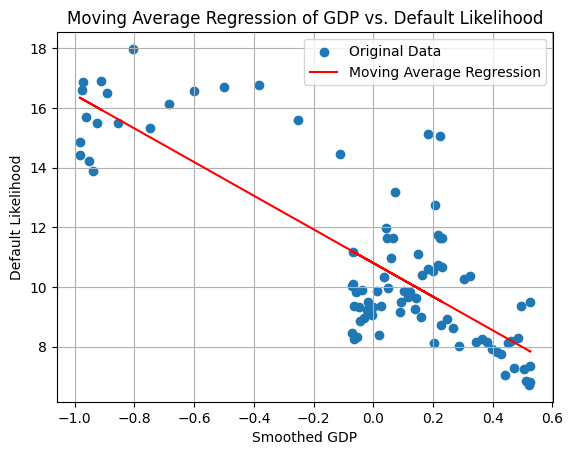

In [ ]:
# Scatter plot of original data
plt.scatter(df_gdp_corr['GDP_MA'], df_gdp_corr['LIKELIHOODOFDEFAULT'], label='Original Data')

# Plot the regression line
plt.plot(df_gdp_corr['GDP_MA'], ma_model.predict(X_ma), color='red', label='Moving Average Regression')

plt.title('Moving Average Regression of GDP vs. Default Likelihood')
plt.xlabel('Smoothed GDP')
plt.ylabel('Default Likelihood')
plt.legend()
plt.grid(True)
plt.show()


Chile GDP Scaled, Moving average Windows

In [ ]:
print('Original: slope = -1.5099, p=0.000, DW=0.251')
results = []

# Loop over window sizes from 2 to 48 (max)
for window_size in range(2, 48):
    # Calculate moving averages
    df_gdp_corr['GDP_MA'] = df_gdp_corr['GDP_Scaled'].rolling(window=window_size).mean()

    # Drop NA values that result from moving average calculation
    df_valid = df_gdp_corr.dropna()

    # Prepare data for linear regression
    X_ma = df_valid['GDP_MA']
    X_ma = sm.add_constant(X_ma)  # adding a constant to the model
    y_ma = df_valid['LIKELIHOODOFDEFAULT']

    # Fit regression model
    ma_model = sm.OLS(y_ma, X_ma).fit()

    # Retrieve the model's parameters
    intercept, slope = ma_model.params
    intercept_pvalue, slope_pvalue = ma_model.pvalues
    dw_score = durbin_watson(ma_model.resid)

    # Store results in list
    results.append({
        'Window Size': window_size,
        'Slope': slope,
        'Slope P-Value': slope_pvalue,
        'Durbin-Watson Score': dw_score
    })

# Print results
for result in results:
    print(f"Window Size: {result['Window Size']}")
    print(f"Slope: {result['Slope']:.3f}, P-value: {result['Slope P-Value']:.3f}")
    print(f"Durbin-Watson Score: {result['Durbin-Watson Score']:.3f}")
    print('---')


Original: slope = -1.5099, p=0.000, DW=0.251


<ipython-input-39-0d943b781c94>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp_corr['GDP_MA'] = df_gdp_corr['GDP_Scaled'].rolling(window=window_size).mean()
<ipython-input-39-0d943b781c94>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp_corr['GDP_MA'] = df_gdp_corr['GDP_Scaled'].rolling(window=window_size).mean()
<ipython-input-39-0d943b781c94>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

Window Size: 2
Slope: -1.017, P-value: 0.000
Durbin-Watson Score: 0.397
---
Window Size: 3
Slope: -1.141, P-value: 0.000
Durbin-Watson Score: 0.428
---
Window Size: 4
Slope: -1.252, P-value: 0.000
Durbin-Watson Score: 0.471
---
Window Size: 5
Slope: -1.355, P-value: 0.000
Durbin-Watson Score: 0.513
---
Window Size: 6
Slope: -1.450, P-value: 0.000
Durbin-Watson Score: 0.567
---
Window Size: 7
Slope: -1.541, P-value: 0.000
Durbin-Watson Score: 0.623
---
Window Size: 8
Slope: -1.631, P-value: 0.000
Durbin-Watson Score: 0.678
---
Window Size: 9
Slope: -1.718, P-value: 0.000
Durbin-Watson Score: 0.735
---
Window Size: 10
Slope: -1.801, P-value: 0.000
Durbin-Watson Score: 0.779
---
Window Size: 11
Slope: -1.870, P-value: 0.000
Durbin-Watson Score: 0.834
---
Window Size: 12
Slope: -1.952, P-value: 0.000
Durbin-Watson Score: 0.828
---
Window Size: 13
Slope: -2.014, P-value: 0.000
Durbin-Watson Score: 0.941
---
Window Size: 14
Slope: -2.072, P-value: 0.000
Durbin-Watson Score: 1.077
---
Window 

# Chile GDP Growth Rate Normalized monthly
not scaled, %-%

In [ ]:
#Calculate growth rate into column
df_gdp['GDP_NORMALIZED'] = pd.to_numeric(df_gdp['GDP_NORMALIZED'], errors='coerce')
df_gdp['GDP_Growth_Rate'] = df_gdp['GDP_NORMALIZED'].pct_change()
df_gdp['GDP_Growth_Rate'] = df_gdp['GDP_Growth_Rate'] * 100
df_gdp

,EXTRACTIONDATE,OBSERVATION_DATE,GDP_NORMALIZED,YEAR,MONTH,LIKELIHOODOFDEFAULT,GDP_Scaled,GDP_Growth_Rate
0,2024-03-31,2006-01-01,100.776983,2006,1,1.9363,0.486165,NaN
1,2024-03-31,2006-02-01,100.804387,2006,2,1.7998,0.502420,0.027193
2,2024-03-31,2006-03-01,100.858167,2006,3,3.6930,0.534320,0.053350
3,2024-03-31,2006-04-01,100.934271,2006,4,3.6691,0.579462,0.075456
4,2024-03-31,2006-05-01,101.023159,2006,5,2.6561,0.632187,0.088065
...,...,...,...,...,...,...,...,...
186,2024-03-31,2021-07-01,100.708930,2021,7,14.4391,0.445799,0.505568
187,2024-03-31,2021-08-01,101.208495,2021,8,16.6013,0.742122,0.496049
188,2024-03-31,2021-09-01,101.663892,2021,9,15.7074,1.012246,0.449959
189,2024-03-31,2021-10-01,102.068399,2021,10,13.9014,1.252184,0.397887


In [ ]:
df_gdp_gr = df_gdp[['GDP_Growth_Rate', 'LIKELIHOODOFDEFAULT']]
df_gdp_gr.head()

,GDP_Growth_Rate,LIKELIHOODOFDEFAULT
0,NaN,1.9363
1,0.027193,1.7998
2,0.053350,3.6930
3,0.075456,3.6691
4,0.088065,2.6561


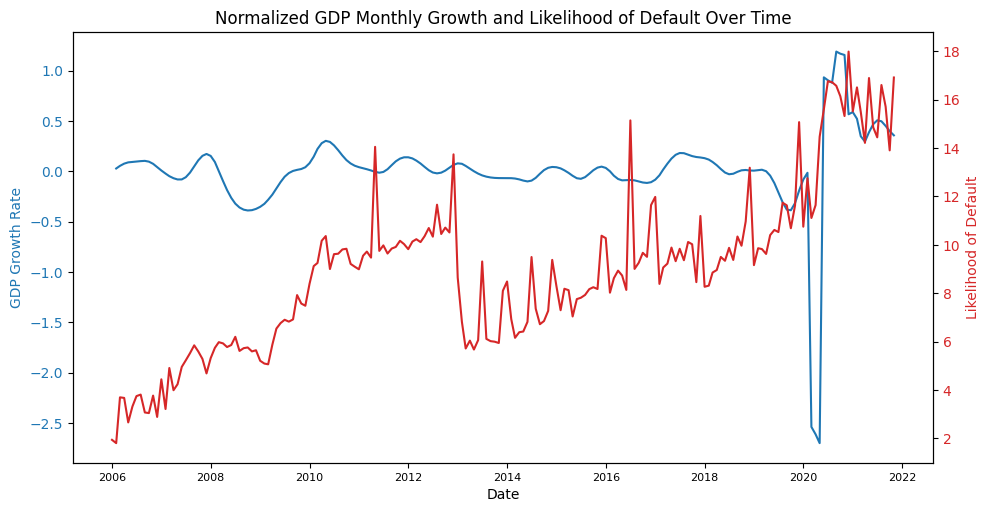

In [ ]:
# Normalized GDP and Likelihood of Default Over Time

# Convert 'Date' column to datetime format
df_gdp['OBSERVATION_DATE'] = pd.to_datetime(df_gdp['OBSERVATION_DATE'])

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('GDP Growth Rate', color=color)
ax1.plot(df_gdp['OBSERVATION_DATE'], df_gdp['GDP_Growth_Rate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.tick_params(axis='x', labelsize=8)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Likelihood of Default', color=color)  # We already handled the x-label with ax1
ax2.plot(df_gdp['OBSERVATION_DATE'], df_gdp['LIKELIHOODOFDEFAULT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure tight layout so labels are not cut off
plt.title('Normalized GDP Monthly Growth and Likelihood of Default Over Time')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_gdp_gr = df_gdp_gr.dropna()

y = df_gdp_gr['LIKELIHOODOFDEFAULT']
X = df_gdp_gr['GDP_Growth_Rate']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.054
Model:                             OLS   Adj. R-squared:                  0.049
Method:                  Least Squares   F-statistic:                     10.78
Date:                 Wed, 01 May 2024   Prob (F-statistic):            0.00122
Time:                         11:48:23   Log-Likelihood:                -493.72
No. Observations:                  190   AIC:                             991.4
Df Residuals:                      188   BIC:                             997.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.9186      

In [ ]:
# Print the result
print(f"Model Pearson Correlation Coefficient: {corr_coef}")
print("Model R-squared: {:.3f}".format(model.rsquared))

print("\nModel Coefficients:")
print(f"Intercept: {model.params[0]:.3f}")
print(f"Slope (GDP Growth): {model.params[1]:.3f}")

print("\nModel P-values:")
print(f"P-value (Intercept): {model.pvalues[0]:.3f}")
print(f"P-value (GDP Growth): {model.pvalues[1]:.3f}")

print("\nModel Standard Errors:")
print(f"Standard Error (Intercept): {model.bse[0]:.3f}")
print(f"Standard Error (GDP Growth): {model.bse[1]:.3f}")

Model Pearson Correlation Coefficient: 0.7370409599689878
Model R-squared: 0.054

Model Coefficients:
Intercept: 8.919
Slope (GDP Growth): 1.875

Model P-values:
P-value (Intercept): 0.000
P-value (GDP Growth): 0.001

Model Standard Errors:
Standard Error (Intercept): 0.237
Standard Error (GDP Growth): 0.571


Chile GDP growth rate moving average


In [ ]:
# Calculate moving averages
window_size =5  # 12 periods moving average
df_gdp_gr['GDP_GR_MA'] = df_gdp_gr['GDP_Growth_Rate'].rolling(window=window_size).mean()

# Drop NA values that result from moving average calculation
df_gdp_gr.dropna(inplace=True)

# Prepare data for linear regression
X_ma = df_gdp_gr['GDP_GR_MA']
X_ma = sm.add_constant(X_ma)  # adding a constant to the model
y_ma = df_gdp_gr['LIKELIHOODOFDEFAULT']

# Fit regression model
ma_model = sm.OLS(y_ma, X_ma).fit()

# Print the summary of the model
print(ma_model.summary())

# You could also calculate the Pearson correlation coefficient for the smoothed series if interested
corr_coef_ma = np.corrcoef(df_gdp_gr['GDP_GR_MA'], df_gdp_gr['LIKELIHOODOFDEFAULT'])[0, 1]
print(f"Moving Average Model Pearson Correlation Coefficient: {corr_coef_ma}")
print("Moving Average Model R-squared: {:.3f}".format(ma_model.rsquared))

print("\nMoving Average Model Coefficients:")
print(f"Intercept: {ma_model.params[0]:.3f}")
print(f"Slope (GDP GR, moving average): {ma_model.params[1]:.3f}")

print("\nMoving Average Model P-values:")
print(f"P-value (Intercept): {ma_model.pvalues[0]:.3f}")
print(f"P-value (GDP GR, moving average): {ma_model.pvalues[1]:.3f}")

print("\nMoving Average Model Standard Errors:")
print(f"Standard Error (Intercept): {ma_model.bse[0]:.3f}")
print(f"Standard Error (GDP GR, moving average): {ma_model.bse[1]:.3f}")


                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.046
Model:                             OLS   Adj. R-squared:                  0.040
Method:                  Least Squares   F-statistic:                     7.426
Date:                 Tue, 23 Apr 2024   Prob (F-statistic):            0.00718
Time:                         21:49:44   Log-Likelihood:                -380.23
No. Observations:                  155   AIC:                             764.5
Df Residuals:                      153   BIC:                             770.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8844      0.228     43.44

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

print('Original: slope =1.8747, p=0.001, DW=0.232')
results = []

# Assuming df_gdp_gr is your original DataFrame and it has been appropriately loaded

# Loop over window sizes from 2 to 155 (max)
for window_size in range(2, 155):
    # Calculate moving averages
    df_gdp_gr['GDP_GR_MA'] = df_gdp_gr['GDP_Growth_Rate'].rolling(window=window_size).mean()

    # Drop NA values that result from moving average calculation
    df_valid = df_gdp_gr.dropna()

    # Prepare data for linear regression from the 'df_valid' DataFrame
    X_ma = df_valid['GDP_GR_MA']
    X_ma = sm.add_constant(X_ma)  # adding a constant to the model
    y_ma = df_valid['LIKELIHOODOFDEFAULT']

    # Fit regression model
    ma_model = sm.OLS(y_ma, X_ma).fit()

    # Retrieve the model's parameters
    intercept, slope = ma_model.params
    intercept_pvalue, slope_pvalue = ma_model.pvalues
    dw_score = durbin_watson(ma_model.resid)

    # Store results in list
    results.append({
        'Window Size': window_size,
        'Slope': slope,
        'Slope P-Value': slope_pvalue,
        'Durbin-Watson Score': dw_score
    })

# Print results
for result in results:
    print(f"Window Size: {result['Window Size']}")
    print(f"Slope: {result['Slope']:.3f}, P-value: {result['Slope P-Value']:.3f}")
    print(f"Durbin-Watson Score: {result['Durbin-Watson Score']:.3f}")
    print('---')


Original: slope =1.8747, p=0.001, DW=0.232
Window Size: 2
Slope: 1.968, P-value: 0.002
Durbin-Watson Score: 0.221
---
Window Size: 3
Slope: 1.945, P-value: 0.004
Durbin-Watson Score: 0.225
---
Window Size: 4
Slope: 1.976, P-value: 0.007
Durbin-Watson Score: 0.222
---
Window Size: 5
Slope: 1.994, P-value: 0.011
Durbin-Watson Score: 0.225
---
Window Size: 6
Slope: 2.025, P-value: 0.016
Durbin-Watson Score: 0.228
---
Window Size: 7
Slope: 2.106, P-value: 0.019
Durbin-Watson Score: 0.226
---
Window Size: 8
Slope: 2.093, P-value: 0.028
Durbin-Watson Score: 0.229
---
Window Size: 9
Slope: 2.078, P-value: 0.038
Durbin-Watson Score: 0.231
---
Window Size: 10
Slope: 1.992, P-value: 0.058
Durbin-Watson Score: 0.237
---
Window Size: 11
Slope: 1.934, P-value: 0.079
Durbin-Watson Score: 0.239
---
Window Size: 12
Slope: 1.886, P-value: 0.101
Durbin-Watson Score: 0.241
---
Window Size: 13
Slope: 1.747, P-value: 0.148
Durbin-Watson Score: 0.243
---
Window Size: 14
Slope: 1.561, P-value: 0.219
Durbin-W

# Santiago GDP Pesos Yearly
scaled

In [ ]:
uploaded=files.upload()
df_sgdp = pd.read_csv('Santiago_gdp_yearly_agg.csv')
scaler = StandardScaler()
S_gdp_scaled = scaler.fit_transform(df_sgdp[['GDP(million_pesos)']].fillna(0))

# Replace the original 'CPI_Growth_Rate' column with the standardized values
df_sgdp['Santiago_GDP_Scaled'] = S_gdp_scaled

# Multiply the 'LIKELIHOODOFDEFAULT' column by 100
df_sgdp['LIKELIHOODOFDEFAULT'] = df_sgdp['LIKELIHOODOFDEFAULT'] * 100

df_sgdp.head()

Saving Santiago_gdp_yearly_agg.csv to Santiago_gdp_yearly_agg.csv


,EXTRACTIONDATE,REG,Descripción series,YEAR,DATE,GDP(million_pesos),LIKELIHOODOFDEFAULT,Santiago_GDP_Scaled
0,2024-03-23,14.0,Producto Interno Bruto,2013,2013-12-31,57950.692393,6.8015,-1.531114
1,2024-03-23,14.0,Producto Interno Bruto,2014,2014-12-31,61747.513018,7.4191,-1.221250
2,2024-03-23,14.0,Producto Interno Bruto,2015,2015-12-31,67395.594568,8.1544,-0.760303
3,2024-03-23,14.0,Producto Interno Bruto,2016,2016-12-31,72096.318083,9.9478,-0.376671
4,2024-03-23,14.0,Producto Interno Bruto,2017,2017-12-31,75041.892228,9.9008,-0.136279


In [ ]:
# pick only Santiago GDP and Default Likelihood
df_sgdp_corr = df_sgdp[['Santiago_GDP_Scaled', 'LIKELIHOODOFDEFAULT']]
df_sgdp_corr.head()

,Santiago_GDP_Scaled,LIKELIHOODOFDEFAULT
0,-1.531114,6.8015
1,-1.221250,7.4191
2,-0.760303,8.1544
3,-0.376671,9.9478
4,-0.136279,9.9008


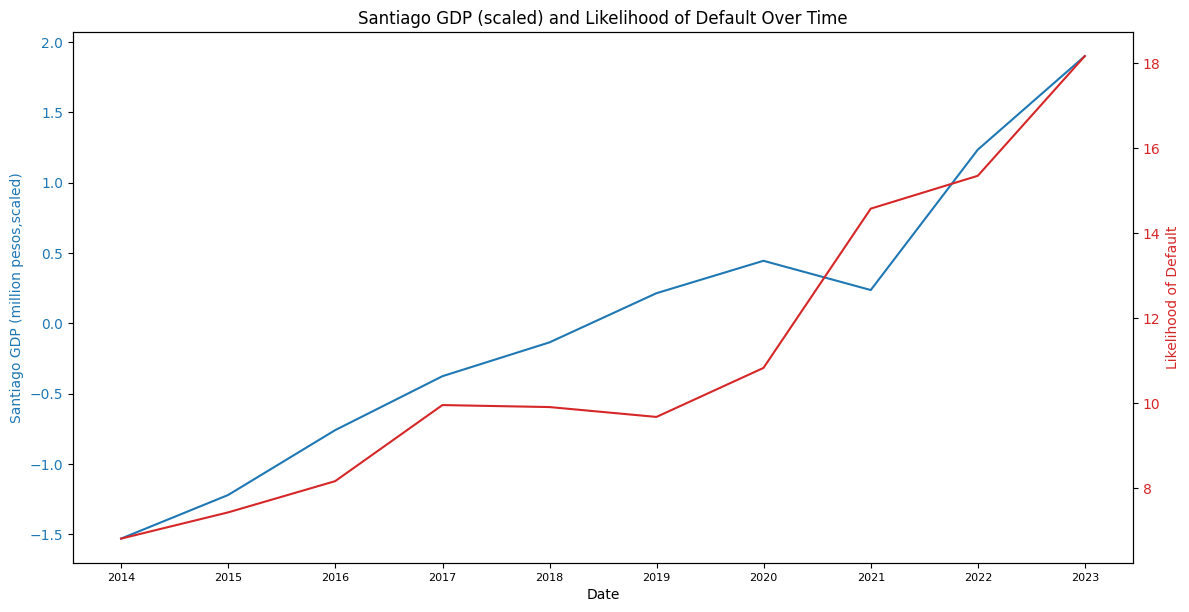

In [ ]:
# Santiago GDP and Likelihood of Default Over Time

# Convert 'Date' column to datetime format
df_sgdp['DATE'] = pd.to_datetime(df_sgdp['DATE'])

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Santiago GDP (million pesos,scaled)', color=color)
ax1.plot(df_sgdp['DATE'], df_sgdp['Santiago_GDP_Scaled'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.tick_params(axis='x', labelsize=8)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Likelihood of Default', color=color)  # We already handled the x-label with ax1
ax2.plot(df_sgdp['DATE'], df_sgdp['LIKELIHOODOFDEFAULT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure tight layout so labels are not cut off
plt.title('Santiago GDP (scaled) and Likelihood of Default Over Time')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Compute the Pearson correlation coefficient
corr_coef = np.corrcoef(df_sgdp_corr['Santiago_GDP_Scaled'], df_sgdp_corr['LIKELIHOODOFDEFAULT'])[0, 1]

# Prepare data for OLS regression
X = df_sgdp_corr['Santiago_GDP_Scaled']
X = sm.add_constant(X)  # adding a constant to the model
y = df_sgdp_corr['LIKELIHOODOFDEFAULT']

# Fit OLS model
sgdp_model = sm.OLS(y, X).fit()

# Print the summary of the OLS model
print(sgdp_model.summary())

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.865
Model:                             OLS   Adj. R-squared:                  0.848
Method:                  Least Squares   F-statistic:                     51.17
Date:                 Tue, 09 Apr 2024   Prob (F-statistic):           9.68e-05
Time:                         09:39:47   Log-Likelihood:                -16.842
No. Observations:                   10   AIC:                             37.68
Df Residuals:                        8   BIC:                             38.29
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  1

In [ ]:
# Print the result
print(f"Model Pearson Correlation Coefficient: {corr_coef}")
print("Model R-squared: {:.3f}".format(sgdp_model.rsquared))

print("\nModel Coefficients:")
print(f"Intercept: {sgdp_model.params[0]:.3f}")
print(f"Slope (Santiago GDP): {sgdp_model.params[1]:.3f}")

print("\nModel P-values:")
print(f"P-value (Intercept): {sgdp_model.pvalues[0]:.3f}")
print(f"P-value (Santiago GDP): {sgdp_model.pvalues[1]:.3f}")

print("\nModel Standard Errors:")
print(f"Standard Error (Intercept): {sgdp_model.bse[0]:.3f}")
print(f"Standard Error (Santiago GDP): {sgdp_model.bse[1]:.3f}")

Model Pearson Correlation Coefficient: 0.9299428886394591
Model R-squared: 0.865

Model Coefficients:
Intercept: 11.081
Slope (Santiago GDP): 3.297

Model P-values:
P-value (Intercept): 0.000
P-value (Santiago GDP): 0.000

Model Standard Errors:
Standard Error (Intercept): 0.461
Standard Error (Santiago GDP): 0.461


# Santiago GDP Growth Rate pesos yearly
not scaled, %-%

In [ ]:
#Calculate growth rate into column
df_sgdp['GDP(million_pesos)'] = pd.to_numeric(df_sgdp['GDP(million_pesos)'], errors='coerce')
df_sgdp['Santiago_GDP_Growth_Rate'] = df_sgdp['GDP(million_pesos)'].pct_change()
df_sgdp['Santiago_GDP_Growth_Rate'] = df_sgdp['Santiago_GDP_Growth_Rate'] * 100
df_sgdp

,EXTRACTIONDATE,REG,Descripción series,YEAR,DATE,GDP(million_pesos),LIKELIHOODOFDEFAULT,Santiago_GDP_Scaled,Santiago_GDP_Growth_Rate
0,2024-03-23,14.0,Producto Interno Bruto,2013,2013-12-31,57950.692393,6.8015,-1.531114,NaN
1,2024-03-23,14.0,Producto Interno Bruto,2014,2014-12-31,61747.513018,7.4191,-1.221250,6.551812
2,2024-03-23,14.0,Producto Interno Bruto,2015,2015-12-31,67395.594568,8.1544,-0.760303,9.147059
3,2024-03-23,14.0,Producto Interno Bruto,2016,2016-12-31,72096.318083,9.9478,-0.376671,6.974823
4,2024-03-23,14.0,Producto Interno Bruto,2017,2017-12-31,75041.892228,9.9008,-0.136279,4.085610
5,2024-03-23,14.0,Producto Interno Bruto,2018,2018-12-31,79326.313684,9.6684,0.213378,5.709373
6,2024-03-23,14.0,Producto Interno Bruto,2019,2019-12-31,82149.481470,10.8227,0.443781,3.558930
7,2024-03-23,14.0,Producto Interno Bruto,2020,2020-12-31,79602.544458,14.5762,0.235922,-3.100369
8,2024-03-23,14.0,Producto Interno Bruto,2021,2021-12-31,91828.491152,15.3499,1.233697,15.358739
9,2024-03-23,14.0,Producto Interno Bruto,2022,2022-12-31,99978.597924,18.1699,1.898838,8.875357


In [ ]:
df_sgdp_gr = df_sgdp[['Santiago_GDP_Growth_Rate', 'LIKELIHOODOFDEFAULT']]
df_sgdp_gr.head()

,Santiago_GDP_Growth_Rate,LIKELIHOODOFDEFAULT
0,NaN,6.8015
1,6.551812,7.4191
2,9.147059,8.1544
3,6.974823,9.9478
4,4.085610,9.9008


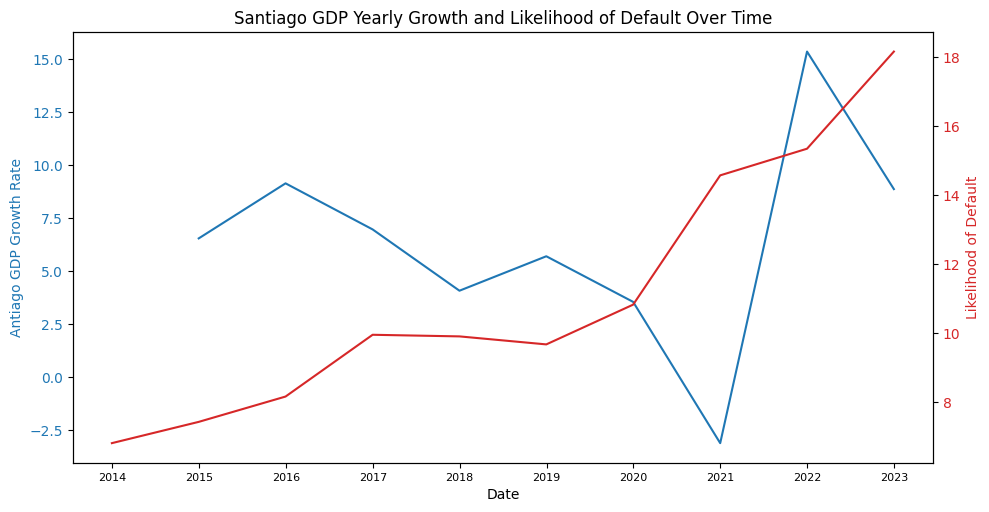

In [ ]:
# Normalized GDP and Likelihood of Default Over Time

# Convert 'Date' column to datetime format
df_sgdp['DATE'] = pd.to_datetime(df_sgdp['DATE'])

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Antiago GDP Growth Rate', color=color)
ax1.plot(df_sgdp['DATE'], df_sgdp['Santiago_GDP_Growth_Rate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.tick_params(axis='x', labelsize=8)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Likelihood of Default', color=color)  # We already handled the x-label with ax1
ax2.plot(df_sgdp['DATE'], df_sgdp['LIKELIHOODOFDEFAULT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure tight layout so labels are not cut off
plt.title('Santiago GDP Yearly Growth and Likelihood of Default Over Time')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_sgdp_gr = df_sgdp_gr.dropna()

y = df_sgdp_gr['LIKELIHOODOFDEFAULT']
X = df_sgdp_gr['Santiago_GDP_Growth_Rate']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.015
Model:                             OLS   Adj. R-squared:                 -0.125
Method:                  Least Squares   F-statistic:                    0.1100
Date:                 Fri, 12 Apr 2024   Prob (F-statistic):              0.750
Time:                         15:28:08   Log-Likelihood:                -23.771
No. Observations:                    9   AIC:                             51.54
Df Residuals:                        7   BIC:                             51.94
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# Print the result

print("\nModel Coefficients:")
print(f"Intercept: {model.params[0]:.3f}")
print(f"Slope (Santiago GDP Growth): {model.params[1]:.3f}")

print("\nModel P-values:")
print(f"P-value (Intercept): {model.pvalues[0]:.3f}")
print(f"P-value (Santiago GDP Growth): {model.pvalues[1]:.3f}")

print("\nModel Standard Errors:")
print(f"Standard Error (Intercept): {model.bse[0]:.3f}")
print(f"Standard Error (Santiago GDP Growth): {model.bse[1]:.3f}")


Model Coefficients:
Intercept: 10.981
Slope (Santiago GDP Growth): 0.091

Model P-values:
P-value (Intercept): 0.001
P-value (Santiago GDP Growth): 0.750

Model Standard Errors:
Standard Error (Intercept): 2.159
Standard Error (Santiago GDP Growth): 0.273


# Household Debt


In [ ]:
# upload
uploaded = files.upload()
df_debt = pd.read_csv('Household_debt_yearly_agg.csv')
scaler = StandardScaler()
debt_scaled = scaler.fit_transform(df_debt[['Debt(%GDP)']].fillna(0))

# Replace the original 'CPI_Growth_Rate' column with the standardized values
df_debt['Debt_Scaled'] = debt_scaled

# Multiply the 'LIKELIHOODOFDEFAULT' column by 100
df_debt['LIKELIHOODOFDEFAULT'] = df_debt['LIKELIHOODOFDEFAULT'] * 100
df_debt.head()

Saving Household_debt_yearly_agg.csv to Household_debt_yearly_agg.csv


,EXTRACTIONDATE,COUNTRY,YEAR,DATE,Debt(%GDP),LIKELIHOODOFDEFAULT,Debt_Scaled
0,2024-03-23,Chile,2006,2006-12-31,26.392439,3.2722,-1.878668
1,2024-03-23,Chile,2007,2007-12-31,29.027133,4.8319,-1.482802
2,2024-03-23,Chile,2008,2008-12-31,32.631886,5.7514,-0.941184
3,2024-03-23,Chile,2009,2009-12-31,33.905979,6.5448,-0.749750
4,2024-03-23,Chile,2010,2010-12-31,32.583076,9.4427,-0.948517


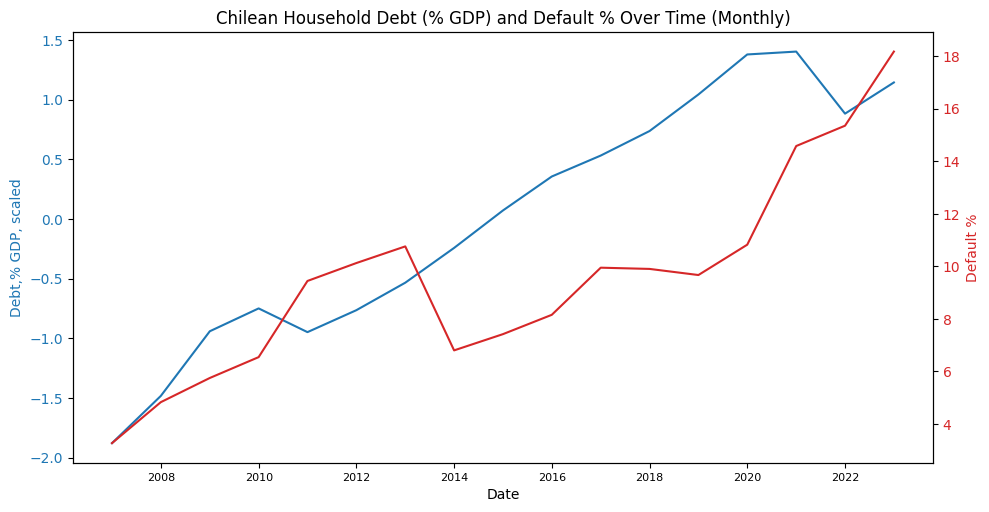

In [ ]:
# Scaled debt and Likelihood of Default Over Time

# Convert 'Date' column to datetime format
df_debt['DATE'] = pd.to_datetime(df_debt['DATE'])

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Debt,% GDP, scaled', color=color)
ax1.plot(df_debt['DATE'], df_debt['Debt_Scaled'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.tick_params(axis='x', labelsize=8)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Default %', color=color)  # We already handled the x-label with ax1
ax2.plot(df_debt['DATE'], df_debt['LIKELIHOODOFDEFAULT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure tight layout so labels are not cut off
plt.title('Chilean Household Debt (% GDP) and Default % Over Time (Monthly)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# pick only Scaled Normalized debt and Default Likelihood
df_debt_corr = df_debt[['Debt_Scaled', 'LIKELIHOODOFDEFAULT']]
df_debt_corr.head()



,Debt_Scaled,LIKELIHOODOFDEFAULT
0,-1.878668,3.2722
1,-1.482802,4.8319
2,-0.941184,5.7514
3,-0.749750,6.5448
4,-0.948517,9.4427


In [ ]:
# Compute the Pearson correlation coefficient
corr_coef = np.corrcoef(df_debt_corr['Debt_Scaled'], df_debt_corr['LIKELIHOODOFDEFAULT'])[0, 1]

# Prepare data for OLS regression
X = df_debt_corr['Debt_Scaled']
X = sm.add_constant(X)  # adding a constant to the model
y = df_debt_corr['LIKELIHOODOFDEFAULT']

# Fit OLS model
debt_model = sm.OLS(y, X).fit()

# Print the summary of the OLS model
print(debt_model.summary())

                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.575
Model:                             OLS   Adj. R-squared:                  0.546
Method:                  Least Squares   F-statistic:                     20.27
Date:                 Mon, 06 May 2024   Prob (F-statistic):           0.000421
Time:                         20:59:54   Log-Likelihood:                -39.216
No. Observations:                   17   AIC:                             82.43
Df Residuals:                       15   BIC:                             84.10
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.5021      0.627     15

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Moving Averages

In [ ]:
print('Original: slope = 2.8250, p=0.000, DW=0.616')
results = []

# Loop over window sizes from 2 to 17 (max)
for window_size in range(2, 17):
    # Calculate moving averages
    df_debt_corr['Debt_MA'] = df_debt_corr['Debt_Scaled'].rolling(window=window_size).mean()

    # Drop NA values that result from moving average calculation
    df_valid = df_debt_corr.dropna()

    # Prepare data for linear regression
    X_ma = df_valid['Debt_MA']
    X_ma = sm.add_constant(X_ma)  # adding a constant to the model
    y_ma = df_valid['LIKELIHOODOFDEFAULT']

    # Fit regression model
    ma_model = sm.OLS(y_ma, X_ma).fit()

    # Retrieve the model's parameters
    intercept, slope = ma_model.params
    intercept_pvalue, slope_pvalue = ma_model.pvalues
    dw_score = durbin_watson(ma_model.resid)

    # Store results in list
    results.append({
        'Window Size': window_size,
        'Slope': slope,
        'Slope P-Value': slope_pvalue,
        'Durbin-Watson Score': dw_score
    })

# Print results
for result in results:
    print(f"Window Size: {result['Window Size']}")
    print(f"Slope: {result['Slope']:.3f}, P-value: {result['Slope P-Value']:.3f}")
    print(f"Durbin-Watson Score: {result['Durbin-Watson Score']:.3f}")
    print('---')


Original: slope = 2.8250, p=0.000, DW=0.616
Window Size: 2
Slope: 2.754, P-value: 0.001
Durbin-Watson Score: 0.649
---
Window Size: 3
Slope: 2.817, P-value: 0.001
Durbin-Watson Score: 0.692
---
Window Size: 4
Slope: 2.858, P-value: 0.002
Durbin-Watson Score: 0.694
---
Window Size: 5
Slope: 2.841, P-value: 0.005
Durbin-Watson Score: 0.629
---
Window Size: 6
Slope: 3.271, P-value: 0.005
Durbin-Watson Score: 0.721
---
Window Size: 7
Slope: 4.024, P-value: 0.002
Durbin-Watson Score: 0.969
---
Window Size: 8
Slope: 5.361, P-value: 0.000
Durbin-Watson Score: 0.953
---
Window Size: 9
Slope: 5.838, P-value: 0.000
Durbin-Watson Score: 0.990
---
Window Size: 10
Slope: 6.378, P-value: 0.001
Durbin-Watson Score: 1.013
---
Window Size: 11
Slope: 6.959, P-value: 0.006
Durbin-Watson Score: 1.137
---
Window Size: 12
Slope: 8.816, P-value: 0.006
Durbin-Watson Score: 1.652
---
Window Size: 13
Slope: 11.287, P-value: 0.004
Durbin-Watson Score: 2.897
---
Window Size: 14
Slope: 12.541, P-value: 0.018
Durbi

<ipython-input-25-adc3210bdf54>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_debt_corr['Debt_MA'] = df_debt_corr['Debt_Scaled'].rolling(window=window_size).mean()
<ipython-input-25-adc3210bdf54>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_debt_corr['Debt_MA'] = df_debt_corr['Debt_Scaled'].rolling(window=window_size).mean()
<ipython-input-25-adc3210bdf54>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [ ]:
# Calculate moving averages
window_size = 12  # 12 periods moving average
df_debt_corr['Debt_MA'] = df_debt_corr['Debt_Scaled'].rolling(window=window_size).mean()

# Drop NA values that result from moving average calculation
df_debt_corr.dropna(inplace=True)

# Prepare data for linear regression
X_ma = df_debt_corr['Debt_MA']
X_ma = sm.add_constant(X_ma)  # adding a constant to the model
y_ma = df_debt_corr['LIKELIHOODOFDEFAULT']

# Fit regression model
ma_model = sm.OLS(y_ma, X_ma).fit()

# Print the summary of the model
print(ma_model.summary())

# You could also calculate the Pearson correlation coefficient for the smoothed series if interested
corr_coef_ma = np.corrcoef(df_debt_corr['Debt_MA'], df_debt_corr['LIKELIHOODOFDEFAULT'])[0, 1]
print(f"Moving Average Model Pearson Correlation Coefficient: {corr_coef_ma}")
print("Moving Average Model R-squared: {:.3f}".format(ma_model.rsquared))

print("\nMoving Average Model Coefficients:")
print(f"Intercept: {ma_model.params[0]:.3f}")
print(f"Slope (Debt, moving average): {ma_model.params[1]:.3f}")

print("\nMoving Average Model P-values:")
print(f"P-value (Intercept): {ma_model.pvalues[0]:.3f}")
print(f"P-value (Debt, moving average): {ma_model.pvalues[1]:.3f}")

print("\nMoving Average Model Standard Errors:")
print(f"Standard Error (Intercept): {ma_model.bse[0]:.3f}")
print(f"Standard Error (Debt, moving average): {ma_model.bse[1]:.3f}")


                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.874
Model:                             OLS   Adj. R-squared:                  0.843
Method:                  Least Squares   F-statistic:                     27.76
Date:                 Wed, 01 May 2024   Prob (F-statistic):            0.00622
Time:                         22:57:52   Log-Likelihood:                -9.2127
No. Observations:                    6   AIC:                             22.43
Df Residuals:                        4   BIC:                             22.01
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6719      0.567     22.34

<ipython-input-63-1a3c126d7f3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_debt_corr['Debt_MA'] = df_debt_corr['Debt_Scaled'].rolling(window=window_size).mean()
<ipython-input-63-1a3c126d7f3f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_debt_corr.dropna(inplace=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


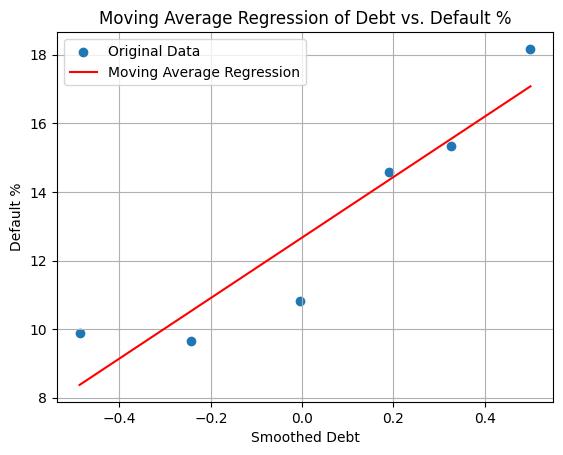

In [ ]:
# Scatter plot of original data
plt.scatter(df_debt_corr['Debt_MA'], df_debt_corr['LIKELIHOODOFDEFAULT'], label='Original Data')

# Plot the regression line
plt.plot(df_debt_corr['Debt_MA'], ma_model.predict(X_ma), color='red', label='Moving Average Regression')

plt.title('Moving Average Regression of Debt vs. Default %')
plt.xlabel('Smoothed Debt')
plt.ylabel('Default %')
plt.legend()
plt.grid(True)
plt.show()


# Household debt growth

In [ ]:
df_debt['Debt_Scaled'] = pd.to_numeric(df_debt['Debt_Scaled'], errors='coerce')
df_debt['Debt_Growth_Rate'] = df_debt['Debt_Scaled'].pct_change()
df_debt['Debt_Growth_Rate'] = df_debt['Debt_Growth_Rate'] * 100
df_debt

,EXTRACTIONDATE,COUNTRY,YEAR,DATE,Debt(%GDP),LIKELIHOODOFDEFAULT,Debt_Scaled,Debt_Growth_Rate
0,2024-03-23,Chile,2006,2006-12-31,26.392439,3.2722,-1.878668,NaN
1,2024-03-23,Chile,2007,2007-12-31,29.027133,4.8319,-1.482802,-21.071627
2,2024-03-23,Chile,2008,2008-12-31,32.631886,5.7514,-0.941184,-36.526686
3,2024-03-23,Chile,2009,2009-12-31,33.905979,6.5448,-0.749750,-20.339717
4,2024-03-23,Chile,2010,2010-12-31,32.583076,9.4427,-0.948517,26.511221
5,2024-03-23,Chile,2011,2011-12-31,33.805600,10.1237,-0.764832,-19.365563
6,2024-03-23,Chile,2012,2012-12-31,35.339992,10.7576,-0.534287,-30.143133
7,2024-03-23,Chile,2013,2013-12-31,37.279834,6.8015,-0.242824,-54.551847
8,2024-03-23,Chile,2014,2014-12-31,39.367669,7.4191,0.070876,-129.188262
9,2024-03-23,Chile,2015,2015-12-31,41.261339,8.1544,0.355402,401.441975


In [ ]:
df_debt_gr = df_debt[['Debt_Growth_Rate', 'LIKELIHOODOFDEFAULT']]
df_debt_gr

,Debt_Growth_Rate,LIKELIHOODOFDEFAULT
0,NaN,3.2722
1,-21.071627,4.8319
2,-36.526686,5.7514
3,-20.339717,6.5448
4,26.511221,9.4427
5,-19.365563,10.1237
6,-30.143133,10.7576
7,-54.551847,6.8015
8,-129.188262,7.4191
9,401.441975,8.1544


In [ ]:
df_debt_gr = df_debt_gr.dropna()

y = df_debt_gr['LIKELIHOODOFDEFAULT']
X = df_debt_gr['Debt_Growth_Rate']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.071
Method:                  Least Squares   F-statistic:                  0.008420
Date:                 Wed, 01 May 2024   Prob (F-statistic):              0.928
Time:                         23:15:04   Log-Likelihood:                -42.694
No. Observations:                   16   AIC:                             89.39
Df Residuals:                       14   BIC:                             90.93
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.8780   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# Not Significant

# Highway

In [6]:
# upload
uploaded = files.upload()
df_hw = pd.read_csv('highway_interurban_yearly_agg.csv')
scaler = StandardScaler()
hw_scaled = scaler.fit_transform(df_hw[['INDEX_INTERURBAN']].fillna(0))

# Replace the original 'CPI_Growth_Rate' column with the standardized values
df_hw['INDEX_Scaled'] = hw_scaled

# Multiply the 'LIKELIHOODOFDEFAULT' column by 100
df_hw['LIKELIHOODOFDEFAULT'] = df_hw['LIKELIHOODOFDEFAULT'] * 100
df_hw.head()


Saving highway_interurban_yearly_agg.csv to highway_interurban_yearly_agg (3).csv


,EXTRACTIONDATE,REG,Descripción series,YEAR,DATE,INDEX_INTERURBAN,LIKELIHOODOFDEFAULT,INDEX_Scaled
0,3/23/2024,15,Pasada de vehículos por plazas de peajes y pór...,2014,12/31/2014,9.557303e+06,7.4191,-1.388561
1,3/23/2024,15,Pasada de vehículos por plazas de peajes y pór...,2015,12/31/2015,1.048325e+07,8.1544,-1.220877
2,3/23/2024,15,Pasada de vehículos por plazas de peajes y pór...,2016,12/31/2016,1.182673e+07,9.9478,-0.977581
3,3/23/2024,15,Pasada de vehículos por plazas de peajes y pór...,2017,12/31/2017,1.352149e+07,9.9008,-0.670670
4,3/23/2024,15,Pasada de vehículos por plazas de peajes y pór...,2018,12/31/2018,1.735575e+07,9.6684,0.023690


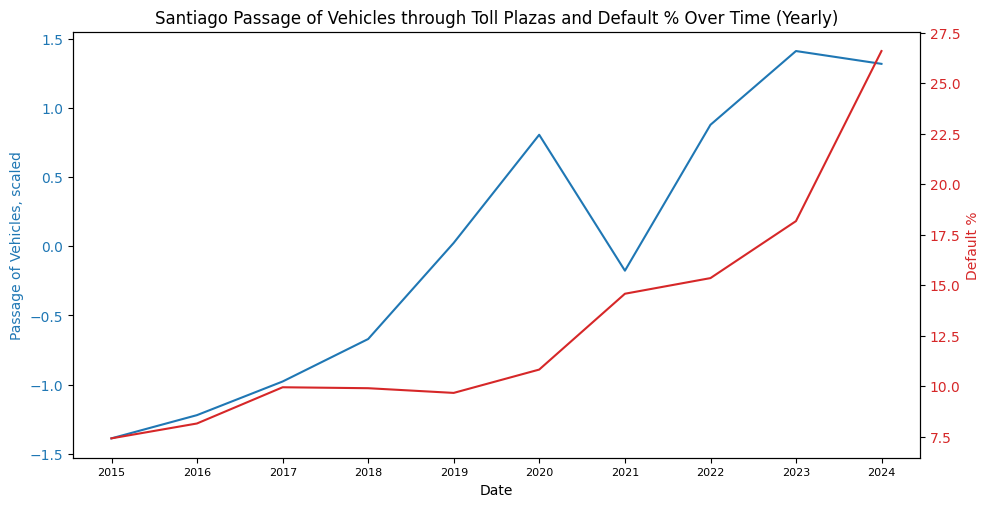

In [7]:
# Convert 'Date' column to datetime format
df_hw['DATE'] = pd.to_datetime(df_hw['DATE'])

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Passage of Vehicles, scaled', color=color)
ax1.plot(df_hw['DATE'], df_hw['INDEX_Scaled'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.tick_params(axis='x', labelsize=8)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Default %', color=color)  # We already handled the x-label with ax1
ax2.plot(df_hw['DATE'], df_hw['LIKELIHOODOFDEFAULT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure tight layout so labels are not cut off
plt.title('Santiago Passage of Vehicles through Toll Plazas and Default % Over Time (Yearly)')
plt.xticks(rotation=45)
plt.show()

In [8]:
# pick only Scaled Normalized debt and Default Likelihood
df_hw_corr = df_hw[['INDEX_Scaled', 'LIKELIHOODOFDEFAULT']]
df_hw_corr.head()



,INDEX_Scaled,LIKELIHOODOFDEFAULT
0,-1.388561,7.4191
1,-1.220877,8.1544
2,-0.977581,9.9478
3,-0.670670,9.9008
4,0.023690,9.6684


In [9]:
# Compute the Pearson correlation coefficient
corr_coef = np.corrcoef(df_hw_corr['INDEX_Scaled'], df_hw_corr['LIKELIHOODOFDEFAULT'])[0, 1]

# Prepare data for OLS regression
X = df_hw_corr['INDEX_Scaled']
X = sm.add_constant(X)  # adding a constant to the model
y = df_hw_corr['LIKELIHOODOFDEFAULT']

# Fit OLS model
hw_model = sm.OLS(y, X).fit()

# Print the summary of the OLS model
print(hw_model.summary())

                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.624
Model:                             OLS   Adj. R-squared:                  0.577
Method:                  Least Squares   F-statistic:                     13.25
Date:                 Fri, 10 May 2024   Prob (F-statistic):            0.00658
Time:                         11:41:33   Log-Likelihood:                -26.452
No. Observations:                   10   AIC:                             56.90
Df Residuals:                        8   BIC:                             57.51
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.0596      1.205    

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


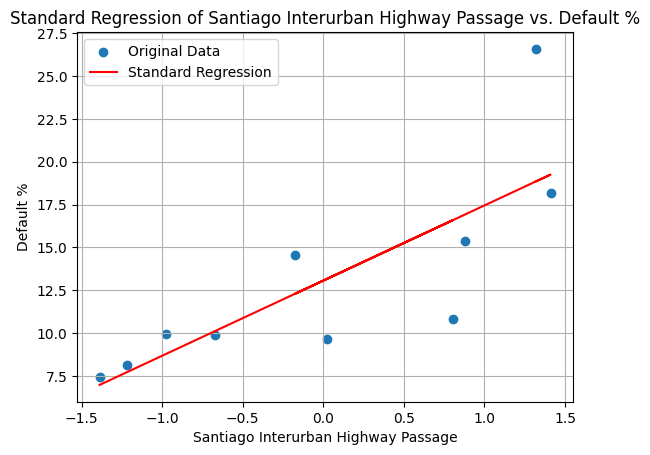

In [13]:
# Scatter plot of original data
plt.scatter(df_hw_corr['INDEX_Scaled'], df_hw_corr['LIKELIHOODOFDEFAULT'], label='Original Data')

# Plot the regression line
plt.plot(df_hw_corr['INDEX_Scaled'], hw_model.predict(X), color='red', label='Standard Regression')

plt.title('Standard Regression of Santiago Interurban Highway Passage vs. Default %')
plt.xlabel('Santiago Interurban Highway Passage')
plt.ylabel('Default %')
plt.legend()
plt.grid(True)
plt.show()
